In [75]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

# Data Reading

In [76]:
df = pd.read_excel("E:\Work & Study\MBA\T4\BDDA2\Project\Supervised & Unsupervised\EU_Superstore_Dataset.xlsx")

# Data Filtering & Cleansing

In [77]:
france_df=df[df["Country/Region"]=="France"]
france_df.head()

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
10,11.0,ES-2020-2510515,20-06-2020,20-06-2020,Same Day,LH-17155,Logan Haushalter,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,France,Central,OFF-LA-10002805,Office Supplies,Labels,"Hon Color Coded Labels, Alphabetical",25.260,2.0,0.00,0.480
11,12.0,ES-2020-2510515,20-06-2020,20-06-2020,Same Day,LH-17155,Logan Haushalter,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,France,Central,OFF-AP-10002330,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",2443.905,5.0,0.10,760.305
12,13.0,ES-2020-2510515,20-06-2020,20-06-2020,Same Day,LH-17155,Logan Haushalter,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,France,Central,OFF-AR-10000505,Office Supplies,Art,"Binney & Smith Pens, Easy-Erase",12.210,1.0,0.00,0.000
13,14.0,ES-2020-2510515,20-06-2020,20-06-2020,Same Day,LH-17155,Logan Haushalter,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,France,Central,TEC-PH-10002898,Technology,Phones,"Samsung Smart Phone, Full Size",2167.296,4.0,0.15,790.416
14,15.0,ES-2020-2510515,20-06-2020,20-06-2020,Same Day,LH-17155,Logan Haushalter,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,France,Central,OFF-ST-10001413,Office Supplies,Storage,"Rogers Folders, Blue",138.105,5.0,0.10,-12.345


In [78]:
france_df = france_df.drop(columns=['Row ID','Order ID','Order Date','Dispatch Date','Customer ID','Customer Name','Country/Region','Product ID'])
france_df.head()

,Delivery Mode,Segment,City,State/Province,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
10,Same Day,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,Central,Office Supplies,Labels,"Hon Color Coded Labels, Alphabetical",25.260,2.0,0.00,0.480
11,Same Day,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,Central,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",2443.905,5.0,0.10,760.305
12,Same Day,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,Central,Office Supplies,Art,"Binney & Smith Pens, Easy-Erase",12.210,1.0,0.00,0.000
13,Same Day,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,Central,Technology,Phones,"Samsung Smart Phone, Full Size",2167.296,4.0,0.15,790.416
14,Same Day,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,Central,Office Supplies,Storage,"Rogers Folders, Blue",138.105,5.0,0.10,-12.345


In [79]:
#Finding out missing values in each column
france_df.isna().sum()

Delivery Mode     0
Segment           0
City              0
State/Province    0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

# Data Visualization

In [80]:
france_df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.351667,0.223528,0.416025
Quantity,0.351667,1.000000,0.010040,0.133227
Discount,0.223528,0.010040,1.000000,-0.223628
Profit,0.416025,0.133227,-0.223628,1.000000


In [81]:
cat=france_df.select_dtypes(include=['object']).columns.tolist()
cat

['Delivery Mode',
 'Segment',
 'City',
 'State/Province',
 'Region',
 'Category',
 'Sub-Category',
 'Product Name']

In [82]:
nums=france_df.select_dtypes(exclude=['object']).columns.tolist()
nums

['Sales', 'Quantity', 'Discount', 'Profit']

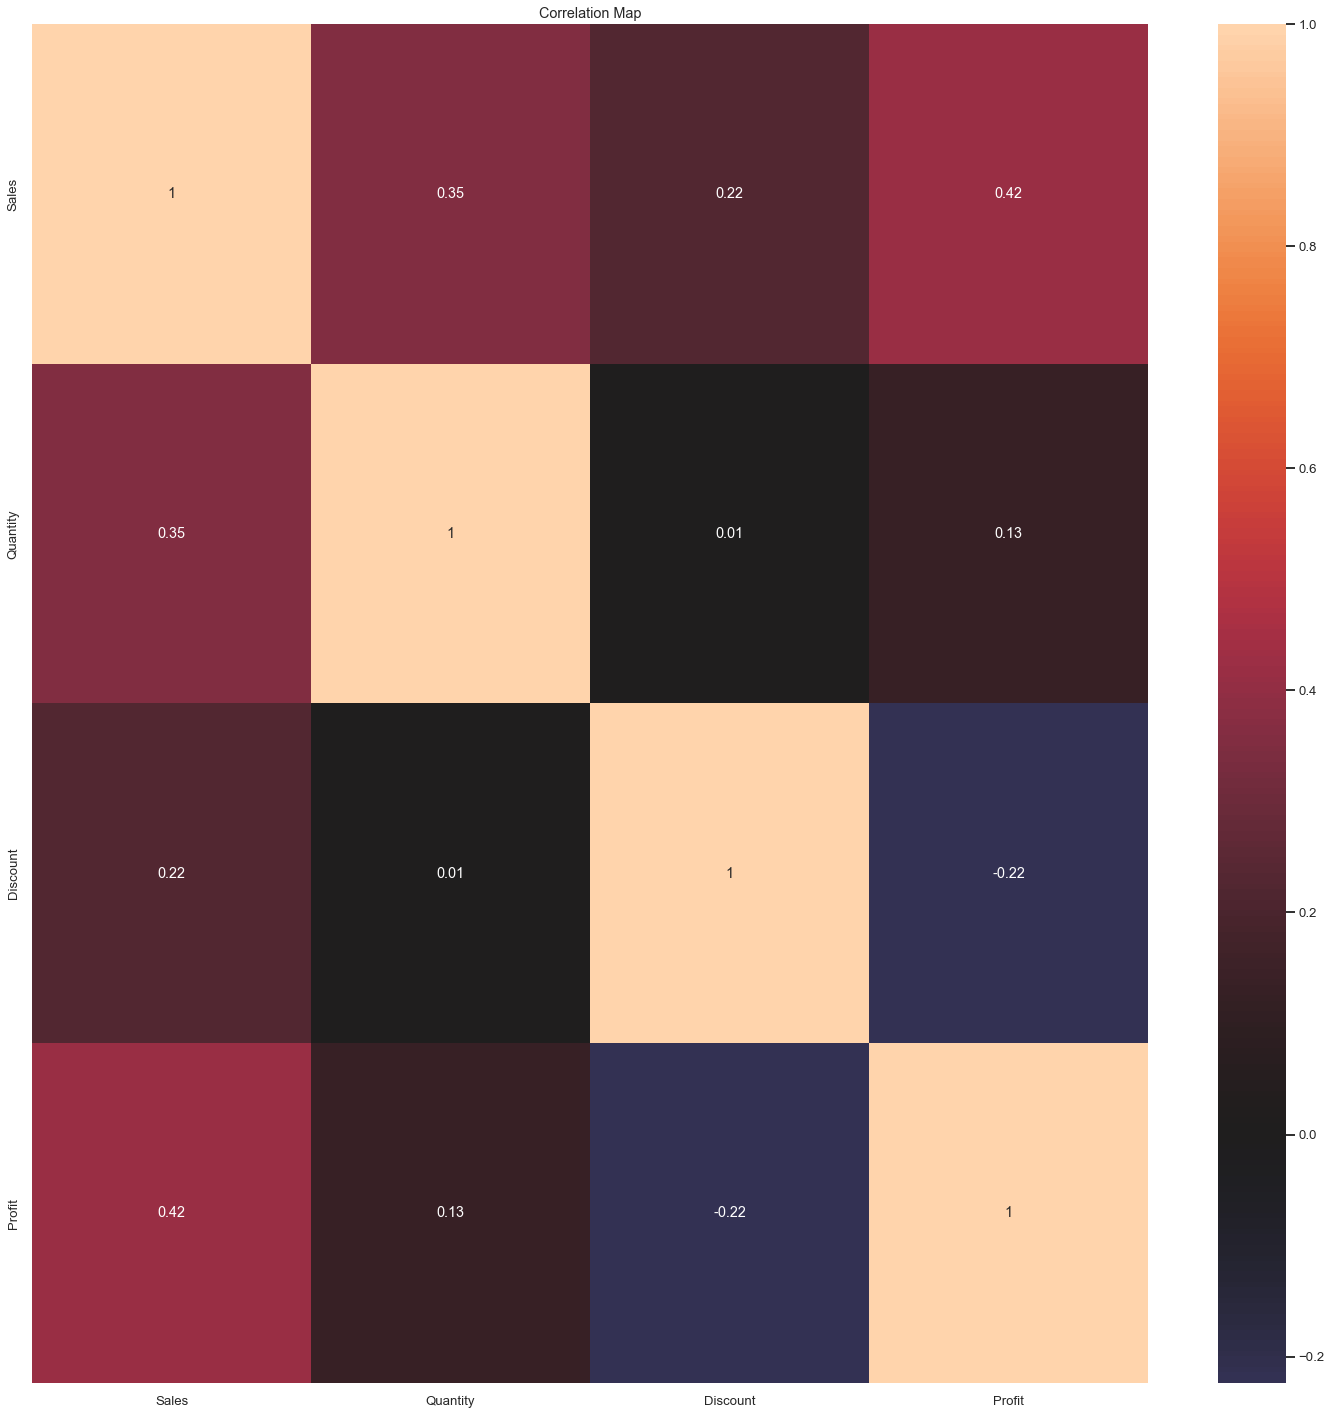

In [83]:
#visualization
plt.figure(figsize=(25,25))
sns.heatmap(france_df[nums].corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

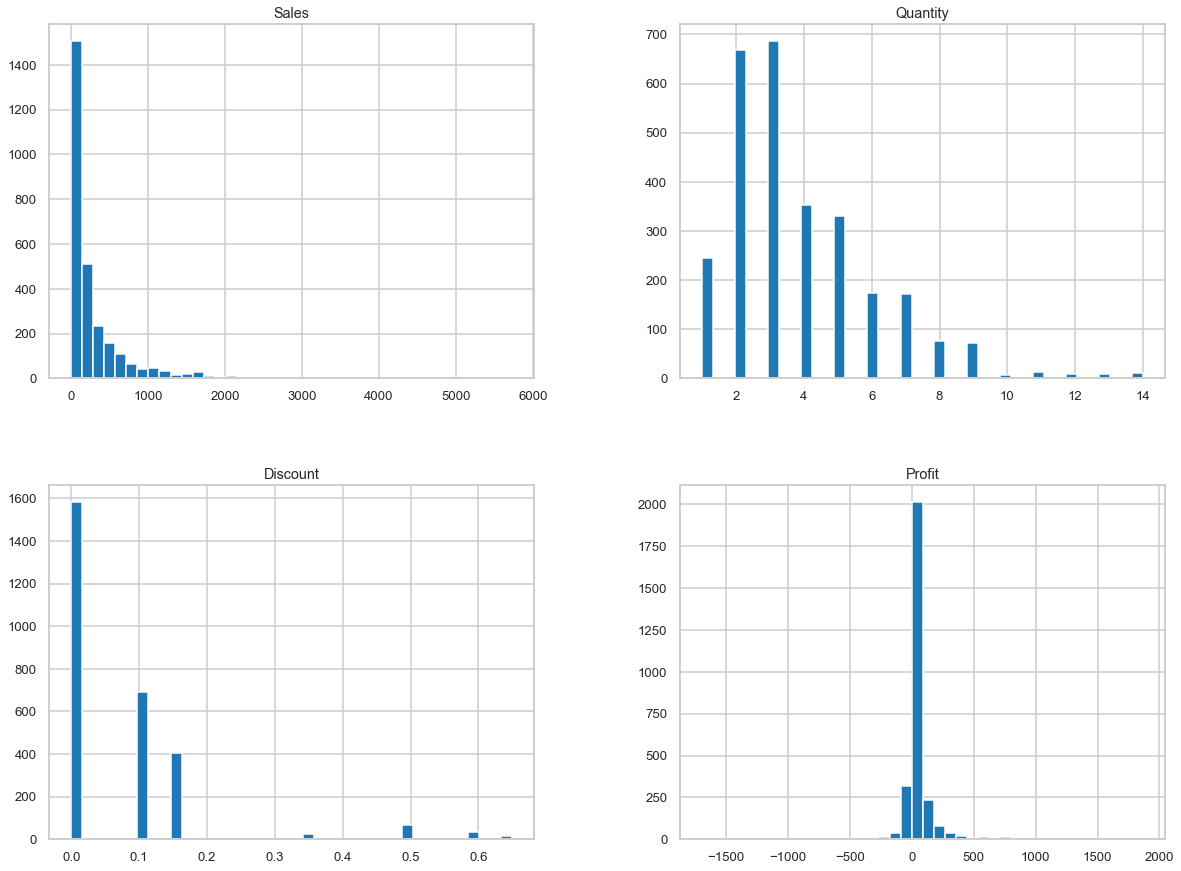

In [84]:
# Histogram of all the numerical attributes
france_df[nums].hist(bins=40, figsize=(20,15)) 
plt.show()

# Scaling & Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
france_df[cat] = france_df[cat].apply(le.fit_transform)
france_df.head()

,Delivery Mode,Segment,City,State/Province,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
10,1,0,180,1,0,1,10,654,25.260,2.0,0.00,0.480
11,1,0,180,1,0,1,1,601,2443.905,5.0,0.10,760.305
12,1,0,180,1,0,1,2,210,12.210,1.0,0.00,0.000
13,1,0,180,1,0,2,13,1052,2167.296,4.0,0.15,790.416
14,1,0,180,1,0,1,14,973,138.105,5.0,0.10,-12.345


# K-Means Clustering

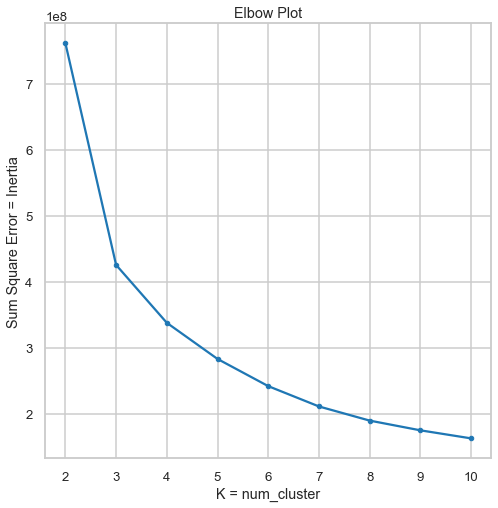

In [86]:
from sklearn.cluster import KMeans
x_cols = np.array(france_df.iloc[:, :32])
ss = [];
ks = range(2, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(x_cols)
    ss.append(kmeans.inertia_)
f, axes = plt.subplots(figsize=(8, 8))
axes.plot(ks, ss, marker='.')
axes.set(xlabel='K = num_cluster', ylabel = 'Sum Square Error = Inertia', title = 'Elbow Plot')
plt.show()

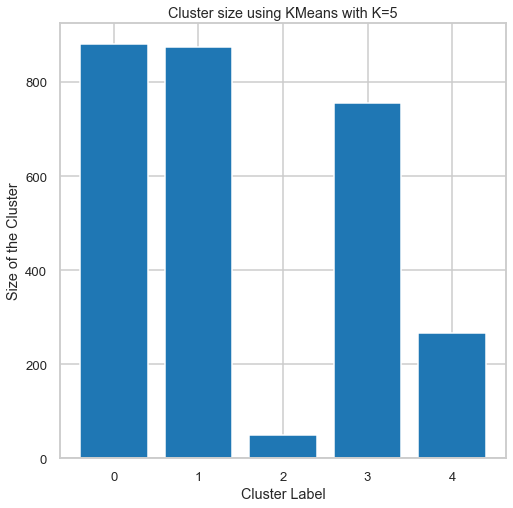

In [89]:
# Pick 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
france_df['labels'] = kmeans.fit_predict(x_cols)
cluster_size = france_df.labels.value_counts()
f, axes = plt.subplots(figsize=(8, 8))
axes.bar(cluster_size.index, cluster_size)
axes.set(xlabel='Cluster Label', ylabel='Size of the Cluster', title='Cluster size using KMeans with K=5')
plt.show()


# The Silhouette Method

n_cluster=3, Average silhouette score = 0.464
n_cluster=4, Average silhouette score = 0.473
n_cluster=5, Average silhouette score = 0.372
n_cluster=6, Average silhouette score = 0.380
n_cluster=7, Average silhouette score = 0.396
n_cluster=8, Average silhouette score = 0.396
n_cluster=9, Average silhouette score = 0.331
n_cluster=10, Average silhouette score = 0.332


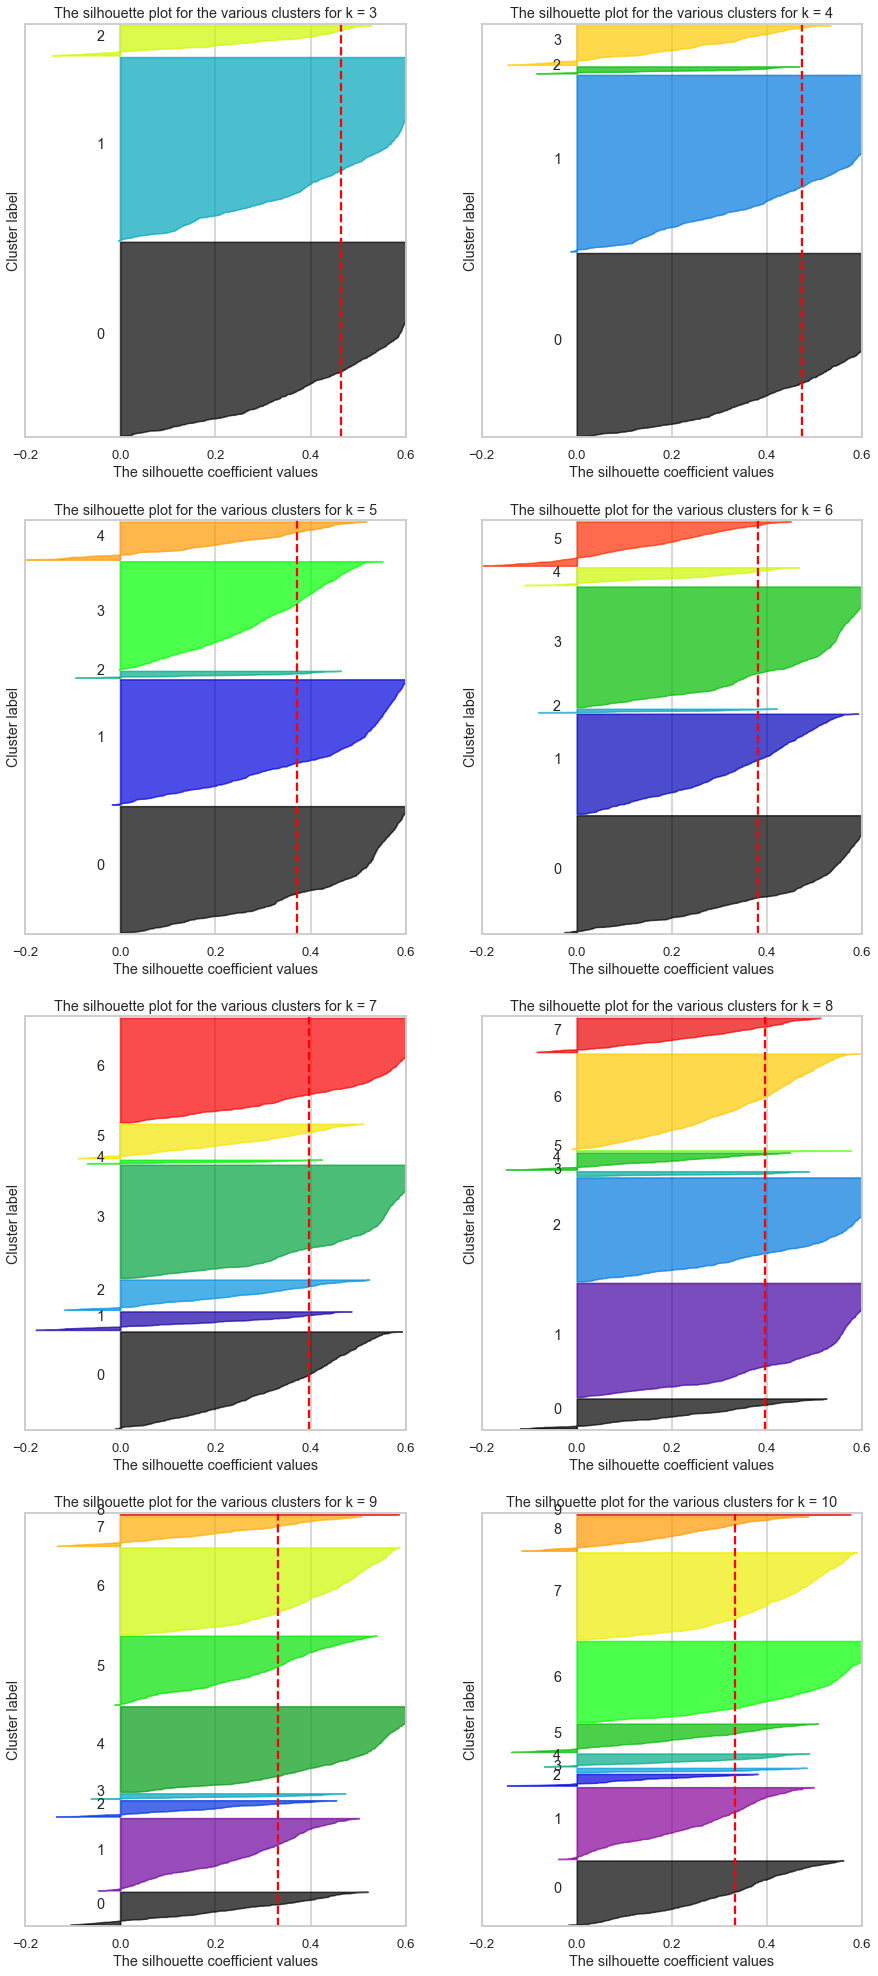

In [90]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
ks = range(3, 11)
f, axes = plt.subplots(len(ks)//2, 2, figsize=(15, 35))
silhouette_avg = []
for idx, k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(x_cols)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg.append(silhouette_score(x_cols, labels))
    print('n_cluster={0}, Average silhouette score = {1:.3f}'.format(k, silhouette_avg[-1]))
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, labels)
    
    # xlim: The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 0.6]
    # ylim: The (n_clusters+1)*10 is for inserting blank space between silhouette 
    # plots of individual clusters, to demarcate them clearly.
    axes[idx//2, idx%2].set(xlim=[-0.2, 0.6], ylim=[0, len(x_cols)+(k+1)*10])
    y_lower=10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        axes[idx//2, idx%2].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axes[idx//2, idx%2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    axes[idx//2, idx%2].set(xlabel='The silhouette coefficient values', ylabel='Cluster label')
    axes[idx//2, idx%2].set(title='The silhouette plot for the various clusters for k = {}'.format(k))
    axes[idx//2, idx%2].axvline(x=silhouette_avg[-1], color='red', linestyle='--')
    axes[idx//2, idx%2].set(yticks=[], xticks=[-0.2, 0, 0.2, 0.4, 0.6])

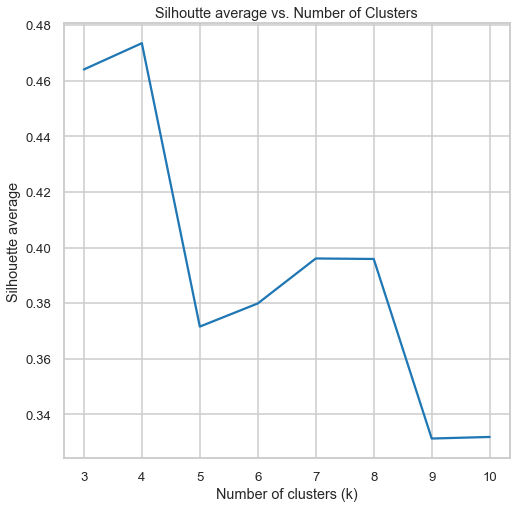

In [91]:
f, axes = plt.subplots(figsize=(8, 8))
axes.plot(ks, silhouette_avg)
axes.set(xlabel='Number of clusters (k)',ylabel = 'Silhouette average', title ='Silhoutte average vs. Number of Clusters')
plt.show()

We see that the silhouette score is maximized at k = 4. So, we will take 4 clusters.

# Agglomerative Clustering

In [92]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
algo_sil_score = pd.DataFrame(index=[ 'Agglomerative Clustering'])
algo_sil_score['algo_avg_silhouette_score']=0
algo_sil_score['cluster_size']=0

k_range = range(2, 11)
l_types = ['ward', 'complete', 'average']
#l_types = ['complete']
max_sil_score = -np.inf
best_k, best_l = None, None
for k in k_range:
    for l in l_types:
        ac = AgglomerativeClustering(n_clusters=k, linkage=l)
        labels = ac.fit_predict(x_cols)
        score = metrics.silhouette_score(x_cols, labels)
        (best_k, best_l, max_sil_score) = (k, l, score) if score>max_sil_score else (best_k, best_l, max_sil_score)
        #print(k, l, score, max_sil_score)
print('Best num cluster = {0:d}, Best linkage = {1}, Best silhouette score = {2:.3f}'.format(best_k, best_l, max_sil_score))

ac = AgglomerativeClustering(n_clusters=best_k, linkage=best_l)
labels = ac.fit_predict(x_cols)
print('Average Silhouette Score: {0:.3f}'.format(metrics.silhouette_score(x_cols, labels)))
algo_sil_score.loc['Agglomerative Clustering'] = [max_sil_score, best_k]

Best num cluster = 2, Best linkage = complete, Best silhouette score = 0.839
Average Silhouette Score: 0.839
